In [146]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display

# ΜΕΡΟΣ Α
_________________________________________________________________________

Υλοποίηση μιας κλάσης Classifier_ML η οποία θα χρησιμοποιηθεί για την ταξινόμηση τιμών x που ακολουθούν την κατανομή πυκνότητας πιθανότητας: \
$p(x| \theta) = \frac{1}{\pi} \frac{1}{1+{(x - \theta)}^2}$
σε δύο κλάσεις, με τη χρήση των dataset $D_1$, $D_2$.

Η συνάρτηση fit εκτιμά την βέλτιστη τιμή των $\theta_1$, $\theta_2$, οι οποίες αποθηκεύονται και σαν μεταβλητές της κλάσης για μετέπειτα χρήση. \
Η συνάρτηση predict ταξινομεί ένα καινούργιο dataset.

In [147]:
class Classifier_ML:

    theta_estimation_1 = None
    theta_estimation_2 = None

    def __init__(self, thetas):
        self.thetas = thetas
    
    def fit(self, D1, D2):

        # Calculate for every sample and every theta, the probability p(x|theta) for dataset  1
        probs_x_theta_1 = (1/np.pi) * (1 / (1 + (D1[:, np.newaxis] - self.thetas)**2))  

        # Compute likelihood p(D|theta) as the product for each theta (along axis 0) for dataset 1
        probs_D_theta_1 = np.prod(probs_x_theta_1, axis=0)

        # Calculate for every sample and every theta, the probability p(x|theta) for dataset  2
        probs_x_theta_2 = (1/np.pi) * (1 / (1 + (D2[:, np.newaxis] - self.thetas)**2))  

        # Compute likelihood p(D|theta) as the product for each theta (along axis 0) for dataset 2
        probs_D_theta_2 = np.prod(probs_x_theta_2, axis=0)


        # Get the value of theta that maximizes the probability p(D|theta)
        # and store it on the correct variable

        self.theta_estimation_1 = self.thetas[np.argmax(probs_D_theta_1)]

        self.theta_estimation_2 = self.thetas[np.argmax(probs_D_theta_2)]

        # return the likelihood (to plot it later)
        return probs_D_theta1, probs_D_theta2

    
    def predict(self, D, P1, P2):
        
        # Calculate for every sample the probability p(x|theta_1)
        P_x_th1 = (1/np.pi) * (1 / (1 + (D - self.theta_estimation_1)**2))

        # Calculate for every sample the probability p(x|theta_2)
        P_x_th2 = (1/np.pi) * (1 / (1 + (D - self.theta_estimation_2)**2))

        # Return matrix that contains g(x) for every x
        return np.log10(P_x_th1) - np.log10(P_x_th2) + np.log10(P1) - np.log10(P2)


### Ερώτημα 1

Υπολογισμός των εκτιμήσεων $\hat{\theta_1}$, $\hat{\theta_2}$ και plotting των $p(D_1|\theta)$, $p(D_2|\theta)$.

Theta estimation for D1 is:  2.5250501002003958 
 Theta estimation fot D2 is:  -3.2464929859719476


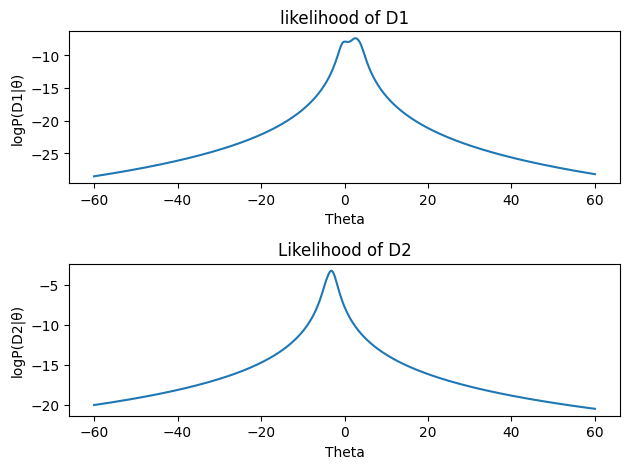

In [148]:

# Create the theta values that will be used for the calculations
theta_Num = 500
theta_interval = 120
dtheta = theta_interval / theta_Num
thetas = np.linspace(-theta_interval/2, theta_interval/2, theta_Num)

# Create Classifier object
classifier = Classifier_ML(thetas)


# Fit models to observations 
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])

probs_D_theta1, probs_D_theta2 = classifier.fit(D1, D2)

print("Theta estimation for D1 is: ", classifier.theta_estimation_1, "\n", \
    "Theta estimation fot D2 is: ", classifier.theta_estimation_2)

# Plot log( p(D|theta) ) for both classes
fig, ax = plt.subplots(2, 1)
ax[0].plot(thetas, np.log10(probs_D_theta1))
ax[0].set_title("likelihood of D1")
ax[0].set_xlabel("Theta")
ax[0].set_ylabel("logP(D1|θ)")
ax[1].plot(thetas, np.log10(probs_D_theta2))
ax[1].set_xlabel("Theta")
ax[1].set_ylabel("logP(D2|θ)")
ax[1].set_title("Likelihood of D2")
fig.tight_layout()
plt.show()

### Ερώτημα 2

Υπολογισμός των τιμών της συνάρτησης διάκρισης $g(x)$ (*discriminant function*) και plotting συναρτήσει των δειγμάτων του dataset.


,x,g(x),Class
0,2.8,1.689205,ω1
1,-0.4,0.125017,ω1
2,-0.8,-0.090887,ω1
3,2.3,1.626600,ω1
4,-0.3,0.178765,ω1
5,3.6,1.492680,ω1
6,4.1,1.344624,ω1
7,-4.5,-1.145734,ω2
8,-3.4,-1.401339,ω2
9,-3.1,-1.358416,ω2


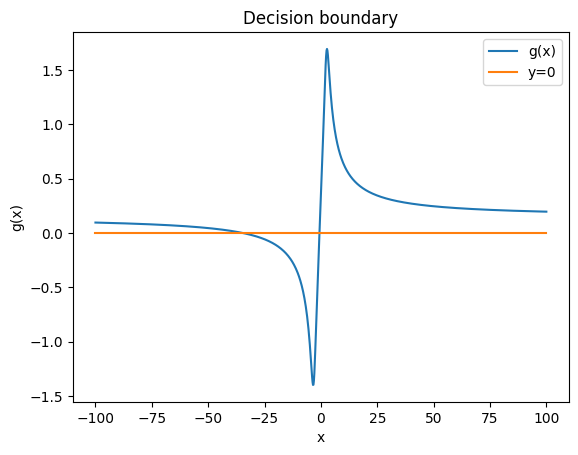

In [149]:
D = np.concatenate([D1, D2])

prediction_D = classifier.predict(D, 7/12, 5/12)

# Print the predictions in a nice table
table_data = pd.DataFrame({
    "x": D,
    "g(x)": prediction_D,
    "Class": ["ω1"]*len(D1) + ["ω2"]*len(D2)
})
display(table_data)

d_graph = np.linspace(-100, 100, 1000)

prediction_graph = classifier.predict(d_graph, 7/12, 5/12)

zero = np.zeros_like(d_graph)
plt.plot(d_graph, prediction_graph)
plt.plot(d_graph, zero)
plt.legend(["g(x)", "y=0"])
plt.xlabel("x")
plt.ylabel("g(x)")
plt.title("Decision boundary")
plt.show()

# ΜΕΡΟΣ Β
____________________________________________________________________________________

Υλοποίηση κλάσης Classifier_Bayes, που θα ταξινομεί πάλι τιμές του x σε δύο κλάσεις, γνωρίζοντας αυτή τη φορά ότι οι τιμές της άγνωστης παραμέτρου θ ακολουθούν τη συνάρτηση πυκνότητας πιθανότητας (prior): $p(\theta) = \frac{1}{10\pi} \frac{1}{1+(\frac{\theta}{10}^2)}$. Χρησιμοποιώντας τη μέθοδο εκτίμησης κατά Bayes, η συνάρτηση fit εκτιμά τις *a posteriori* πιθανότητες $p(\theta|D_1)$, $p(\theta|D_2)$ τις οποίες και αποθηκεύει ως μεταβλητές της κλάσης. Στη συνέχεια η συνάρτηση predict, χρησιμοποιεί τις παραπάνω πιθανότητες και υπολογίζει τις τιμές μιας συνάρτησης διάκρισης με τη βοήθεια της οποίας ταξινομούμε δείγματα καινούριου dataset.

In [150]:
# Function to estimate an integral using the trapezoid rule
# it takes as an input the sampling of a function and the sampling period
def trapezoid_integral (f:np.array, dx:float):
    return np.sum (0.5 * ( f[0:len(f)-1] + f[1:len(f)] ) * dx)


In [151]:
class Classifier_Bayes:
    # a posteriori probabilities p(theta|D1), p(theta|D2)
    P_theta_D1 = None
    P_theta_D2 = None

    def __init__(self, thetas, dtheta):
        self.thetas = thetas
        self.dtheta = dtheta

    def fit(self, D1, D2):

        datasets = [D1,D2]
        
        for i in range (2):
            # Do the calculations for the two classes 
            D = datasets[i]

            # Calculate for every sample and every theta, the probability p(x|theta)
            probs_x_theta = (1/np.pi) * (1 / (1 + (D[:, np.newaxis] - self.thetas)**2))  

            # Compute likelihood p(D|theta) as the product for each theta (along axis 0)
            probs_D_theta = np.prod(probs_x_theta, axis=0)  

            # Calculate prior probability p(theta)
            probs_theta = ( 1 / 10*np.pi ) * ( 1 / ( 1 + (self.thetas/10)**2 ) )

            # Calculate integral p(D|theta)p(theta) dtheta
            integral = trapezoid_integral( probs_D_theta * probs_theta, self.dtheta )

            # Calculate a posteriori probability p(theta|D)
            P_theta_D = ( probs_D_theta * probs_theta ) / integral

            # store the a posteriori probability in the correct variable
            if (i==0):
                self.P_theta_D1 = P_theta_D
            else:
                self.P_theta_D2 = P_theta_D


    def predict(self, D, P1, P2):

        # Calculate for every sample of the new dataset and every theta, the probability p(x|theta)
        probs_x_theta = (1/np.pi) * (1 / (1 + (D[:, np.newaxis] - thetas)**2))  

        # make an empty instance for the probabilities p(x|D1) of every x in the new dataset
        probs_x_D1 = np.empty(len(D))
        for i in range (len(D)):
            # Calculate p(x|D1) as the integral of p(x|theta)*p(theta|D1) for every x in the new dataset
            # p(x|theta) is the i row in the probs_x_theta matrix and p(theta|D1) is stored in the class
            probs_x_D1[i] = trapezoid_integral( probs_x_theta[i] * self.P_theta_D1, dtheta )

        # make an empty instance for the probabilities p(x|D2) of every x in the new dataset
        probs_x_D2 = np.empty(len(D))
        for i in range (len(D)):
            # Calculate p(x|D2) as the integral of p(x|theta)*p(theta|D2) for every x in the new dataset
            # p(x|theta) is the i row in the probs_x_theta matrix and p(theta|D2) is stored in the class
            probs_x_D2[i] = trapezoid_integral( probs_x_theta[i] * self.P_theta_D2, dtheta )
        
        # calculate and return h(x)
        return np.log10(probs_x_D1) - np.log10(probs_x_D2) + np.log10(P1) - np.log10(P2)

        


### Ερώτημα 1

Υπολογισμός των *a posteriori* πιθανοτήτων $p(\theta|D_1)$, $p(\theta|D_2)$ και plotting συναρτήσει της παραμέτρου *θ*.

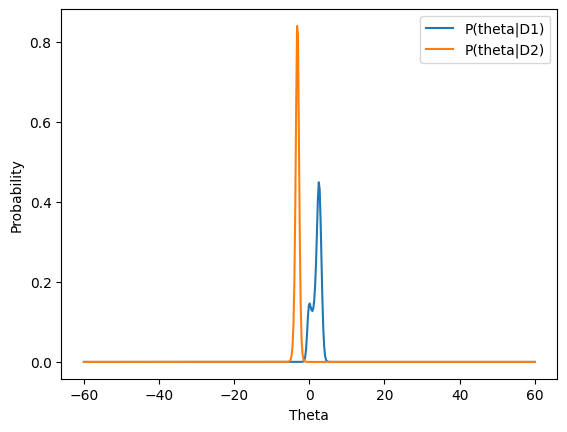

In [152]:
classifier_bayes = Classifier_Bayes(thetas, dtheta)

# Fit models to observations
classifier_bayes.fit(D1, D2)

# Plot the posterior probability p(theta|D1)
plt.plot(thetas, classifier_bayes.P_theta_D1)

# Plot the posterior probability p(theta|D2)
plt.plot(thetas, classifier_bayes.P_theta_D2)


plt.legend(["P(theta|D1)", "P(theta|D2)"])
plt.xlabel("Theta")
plt.ylabel("Probability")
plt.show()


### Ερώτημα 2

Υπολογισμός των τιμών της συνάρτησης διάκρισης $h(x)$ (*discrimant function*) και plotting συναρτήσει των δειγμάτων του dataset.



,x,g(x),Class
0,2.8,1.481023,ω1
1,-0.4,0.462545,ω1
2,-0.8,0.228873,ω1
3,2.3,1.422087,ω1
4,-0.3,0.514863,ω1
5,3.6,1.419364,ω1
6,4.1,1.312459,ω1
7,-4.5,-1.038287,ω2
8,-3.4,-1.162248,ω2
9,-3.1,-1.114946,ω2


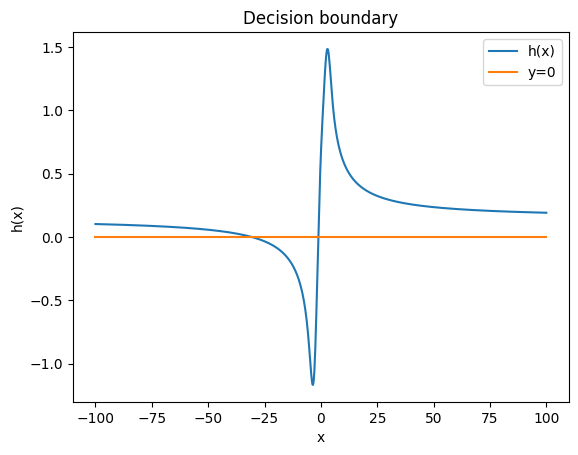

In [153]:
prediction_D_Bayes = classifier_bayes.predict(D, 7/12, 5/12)

# Print the predictions in a nice table
table_data = pd.DataFrame({
    "x": D,
    "g(x)": prediction_D_Bayes,
    "Class": ["ω1"]*len(D1) + ["ω2"]*len(D2)
})
display(table_data)

# Prediction for the new dataset
prediction = classifier_bayes.predict(d_graph, 7/12, 5/12)

# Plot prediction for the new dataset
plt.plot(d_graph, prediction)
plt.plot(d_graph, zero)
plt.legend(["h(x)", "y=0"])
plt.xlabel("x")
plt.ylabel("h(x)")
plt.title("Decision boundary")
plt.show()

# ΜΕΡΟΣ Γ 


## Ενότητα 1

### Ερώτημα 1


In [154]:
# Load the iris dataset
iris = datasets.load_iris() 
X = iris.data
y = iris.target

# Reduce the dataset to 2 features
X_reduced = X[:, 0:2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.5, random_state=42)

# Create a Decision Tree Classifier
DTC = DecisionTreeClassifier(random_state=42)


# Function to tune the model using GridSearchCV
def tune_model(model, param_grid):
    grid = GridSearchCV(model, param_grid, cv=3) # Create a GridSearchCV object
    grid.fit(X_train, y_train) # Train the model
    y_pred = grid.predict(X_test) # Make predictions
    accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
    best_model = grid.best_estimator_ # Get the best model
    return accuracy, best_model

# Tune the model
param_grid = {'max_depth': np.arange(1, 10)}
best_accuracy, best_model = tune_model(DTC, param_grid)
y_pred = best_model.predict(X_test)
print(best_accuracy, best_model)



0.7866666666666666 DecisionTreeClassifier(max_depth=np.int64(3), random_state=42)


#### Ερώτημα 2

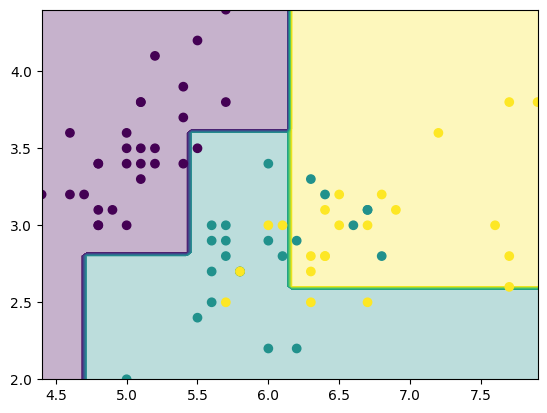

In [155]:

# Plot the decision boundary
feature_1, feature_2 = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100), np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100)) # Create a grid of points
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T # Reshape the grid
predictions = best_model.predict(grid).reshape(feature_1.shape) # Make predictions using the best model
plt.contourf(feature_1, feature_2, predictions, alpha=0.3, cmap='viridis',levels=100) # Plot the decision boundaries
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test) # Scatter plot of the test data
plt.show()


## Ενότητα 2

#### Ερώτημα 1

In [156]:

RFC = RandomForestClassifier(random_state=42, n_estimators=100, bootstrap=True, max_samples = 0.5) # Create a Random Forest Classifier
RFC.fit(X_train, y_train) # Train the model
y_pred = RFC.predict(X_test) # Make predictions
accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
print(accuracy)

best_accuracy, best_model = tune_model(RFC, param_grid) # Tune the model
y_pred = best_model.predict(X_test) # Make predictions
print(best_accuracy, best_model)


0.76
0.8 RandomForestClassifier(max_depth=np.int64(3), max_samples=0.5, random_state=42)


#### Ερώτημα 2

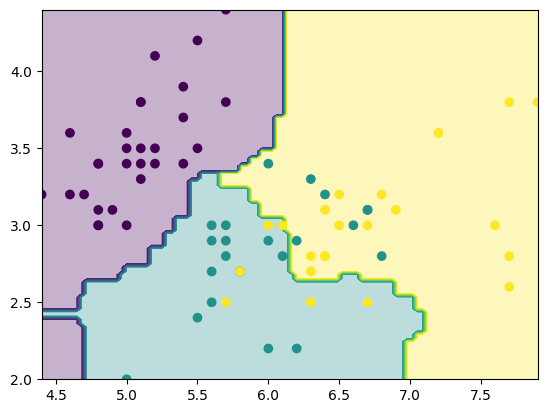

In [157]:

# Plot the decision boundary
feature_1, feature_2 = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100), np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100)) # Create a meshgrid
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T # Reshape the grid
predictions = best_model.predict(grid).reshape(feature_1.shape) # Make predictions using the best model
plt.contourf(feature_1, feature_2, predictions, alpha=0.3, cmap='viridis',levels=100) # Plot the decision boundaries
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test) # Scatter plot of the test data
plt.show()



#### Ερώτημα 3